# Исследование надежности заемщиков.

# Описание проекта
Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.
Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

### Шаг 1. Обзор данных

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/datasets/data.csv')
print(df.info())

### Шаг 2.1 Заполнение пропусков

Пропущенные значения в total_income и days_employed
В двух колонках доля пропусков 10%
Если взять вместо медианы среднюю то будет смещение в одну из сторон. 
Пропуски возможно из за людей которые не поделились информацией о доходе и стаже.
Пропуска заполнил медианой по каждой категории.

In [154]:
total_nan = df.isna().sum() * 100 / len(df) 
display(total_nan.sort_values()) # Процент пропусков по коллонкам

children             0.000000
dob_years            0.000000
education            0.000000
education_id         0.000000
family_status        0.000000
family_status_id     0.000000
gender               0.000000
income_type          0.000000
debt                 0.000000
purpose              0.000000
days_employed       10.099884
total_income        10.099884
dtype: float64

Видим процент отсутвующих значений в 2х колонках. Заменяем их времено на 0.

In [155]:
df['days_employed'] = df['days_employed'].fillna(0) # заполняем пропуски 0 в колонке "days_employed"
df['total_income'] = df['total_income'].fillna(0) # заполняем пропуски 0 в колонке "total_income"

Теперь считаем все важные для исследования колонки с нулем.

In [156]:
#Считаем все пропуски
count_zeros_employed = (df[df['days_employed'] == 0])['days_employed'].count().sum()
print('До обработки значений NaN или "0" в колонке "days_employed" :',count_zeros_employed)
count_zeros_income = (df[df['total_income'] == 0])['total_income'].count().sum()
print('До обработки значений NaN или "0" в колонке "total_income" :',count_zeros_income)
count_zeros_age = (df[df['dob_years'] == 0])['dob_years'].count().sum()
print('До обработки значений "0" в колонке "dob_years" :',count_zeros_age,'\n')

До обработки значений NaN или "0" в колонке "days_employed" : 2174

До обработки значений NaN или "0" в колонке "total_income" : 2174

До обработки значений "0" в колонке "dob_years" : 101 




Как видим колличество не маленькое. Лучшем решением будет создать 3 датафрейма сгрупированных по income_type для того чтобы получить медианы группы для каждой колонки.

In [157]:
#Создаем 3 датафрейма из каждой групировки
print('Получаем таблицы с медианами')
employed_medians = pd.DataFrame(df.groupby('income_type')['days_employed'].median()) # Медианы по days_employed
income_medians = pd.DataFrame(df.groupby('income_type')['total_income'].median()) # Медианы по total_income
age_medians = pd.DataFrame(df.groupby('income_type')['dob_years'].median()) # Медианы по dob_years
display(employed_medians,income_medians,age_medians)


Получаем таблицы с медианами


,days_employed
income_type,
безработный,366413.652744
в декрете,-3296.759962
госслужащий,-2385.358043
компаньон,-1311.128244
пенсионер,360505.668544
предприниматель,-260.424042
сотрудник,-1360.363902
студент,-578.751554


,total_income
income_type,
безработный,131339.751676
в декрете,53829.130729
госслужащий,139034.452386
компаньон,162401.351555
пенсионер,110179.690761
предприниматель,249581.572474
сотрудник,133546.457238
студент,98201.625314


,dob_years
income_type,
безработный,38.0
в декрете,39.0
госслужащий,40.0
компаньон,39.0
пенсионер,60.0
предприниматель,42.5
сотрудник,39.0
студент,22.0


Создаем функцию замены где в циклах для каждого датафрейма с медианой проходимся по строкам и делаем замену в основном датафрейме.

In [158]:
def replace_zeros(column,wrong,correct):
    df[column] = df[column].replace(wrong,correct)
for median in employed_medians.iterrows():
    replace_zeros(column='days_employed',wrong=0,correct = int(median[1]))
for median in income_medians.iterrows():
    replace_zeros(column='total_income',wrong=0,correct =int(median[1]))
for median in age_medians.iterrows():
    replace_zeros(column='dob_years',wrong=0,correct = int(median[1]))

Теперь смотрим финальный результат чтобы нулей и пропусков больше нигде не осталось.

In [159]:
count_zeros_employed = (df['days_employed'].isna()).sum()
print('После обработки значений "0" в колонке "days_employed" :',count_zeros_employed)
count_zeros_income = (df['total_income'].isna()).sum()
print('После обработки значений "0" в колонке "total_income" :',count_zeros_income)
count_zeros_age = (df['dob_years'].isna()).sum()
print('После обработки значений "0" в колонке "dob_years" :',count_zeros_age)
total_nan_final = df.isna().sum() * 100 / len(df)
display(total_nan_final.sort_values()) 

После обработки значений "0" в колонке "days_employed" : 0

После обработки значений "0" в колонке "total_income" : 0

После обработки значений "0" в колонке "dob_years" : 0


children            0.0
days_employed       0.0
dob_years           0.0
education           0.0
education_id        0.0
family_status       0.0
family_status_id    0.0
gender              0.0
income_type         0.0
debt                0.0
total_income        0.0
purpose             0.0
dtype: float64

### Шаг 2.2 Проверка данных на аномалии и исправления.

Проверяем каждый из параметров для ответов на вопросы.
<br>Есть ли зависимость между количеством детей и возвратом кредита в срок?
<br>Есть ли зависимость между семейным положением и возвратом кредита в срок?
<br>Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
<br>Как разные цели кредита влияют на его возврат в срок?

<b>Параметр №1 df['children']</b>

In [160]:
print(df['children'].unique())
display(df.tail(5))

[ 1  0  3  2 -1  4 20  5]


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
21520,1,-4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем
21522,1,-2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость
21523,3,-3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля
21524,2,-1984.507589,40,среднее,1,женат / замужем,0,F,сотрудник,0,82047.418899,на покупку автомобиля


Присутвуют отрицательные значения и необычное колличество детей 20

In [ ]:
print('Отрицательные значения возможно ошибка при записи.')
print('Процент от всей таблицы где число детей указано как "20":',df[df['children']==20]['children'].count().sum() * 100 / len(df))

Так как строк с 20ю детьми меньше 1% то для более чистого анализа их лучше удалить

In [162]:
df['children'] = abs(df['children'])
df = df.drop(df[df['children'] == 20].index).reset_index(drop=True) 

In [163]:
print('Строк с 20 детьми осталось',df[df['children'] == 20]['children'].count().sum())
print('Строк с отрицательным колличеством осталось',df[df['children'] < 0]['children'].count().sum())
print(df['children'].unique())

Строк с 20 детьми осталось 0

Строк с отрицательным колличеством осталось 0

[1 0 3 2 4 5]


<b>Параметр №2 df['days_employed']</b>

In [164]:
display(df.head(10))

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Присутвуют опять же отрицательные значения. Возможно ошибка при расчете.

In [165]:
df['days_employed'] = abs(df['days_employed'])

In [166]:
print('Строк с отрицательным колличеством осталось',df[df['days_employed'] < 0]['days_employed'].count().sum())

Строк с отрицательным колличеством осталось 0


<b>Параметр №3 df['gender']</b>

In [167]:
print(df['gender'].unique())
print('Строк с значением XNA',df[df['gender'] == 'XNA']['gender'].count().sum())

['F' 'M' 'XNA']

Строк с значением XNA 1


Строка одна по этому для чистоты исследования удалим ее.

In [168]:
df = df.drop(df[df['gender'] == 'XNA'].index).reset_index(drop=True) # некорректный пол тоже удалим

In [169]:
print('Строк с полом "XNA" осталось',df[df['gender'] == 'XNA']['gender'].count().sum())

Строк с полом "XNA" осталось 0


<b>Параметр №4 df['family_status']</b>

In [170]:
print(df['family_status'].unique())
gb = df.groupby('family_status')['income_type'].count()
gb

['женат / замужем' 'гражданский брак' 'вдовец / вдова' 'в разводе'

 'Не женат / не замужем']


family_status
Не женат / не замужем     2804
в разводе                 1193
вдовец / вдова             956
гражданский брак          4164
женат / замужем          12331
Name: income_type, dtype: int64

Аномалий не обнаружено.

<b>Параметр №5 df['education']</b>

In [171]:
print('Cмотрим уникальные значения столбца"education"',df['education'].unique())

Cмотрим уникальные значения столбца"education" ['высшее' 'среднее' 'Среднее' 'СРЕДНЕЕ' 'ВЫСШЕЕ' 'неоконченное высшее'

 'начальное' 'Высшее' 'НЕОКОНЧЕННОЕ ВЫСШЕЕ' 'Неоконченное высшее'

 'НАЧАЛЬНОЕ' 'Начальное' 'Ученая степень' 'УЧЕНАЯ СТЕПЕНЬ'

 'ученая степень']


Видим что в колонке есть значения записаные в разных регистрах, для удаления дубликатов необходимо привести все к одному регистру.

In [172]:
df['education'] = df['education'].str.lower()

In [173]:
print('Вновь смотрим уникальные значения столбца"education"',df['education'].unique())

Вновь смотрим уникальные значения столбца"education" ['высшее' 'среднее' 'неоконченное высшее' 'начальное' 'ученая степень']


### Шаг 2.3. Изменение типов данных.

In [174]:
df['days_employed'] = df['days_employed'].astype('int')
df['total_income'] = df['total_income'].astype('int')

### Шаг 2.4. Удаление дубликатов.

In [175]:
print('Колличество дубликатов до обработки',len(df)-len(df.drop_duplicates()))

Колличество дубликатов до обработки 71


In [176]:
df = df.drop_duplicates().reset_index(drop=True)

In [177]:
print('Колличество дубликатов после обработки:',len(df)-len(df.drop_duplicates()))

Колличество дубликатов после обработки: 0


### Шаг 2.5. Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма.

In [178]:
print('Формируем дополнительные датафреймы')
education_cat = pd.DataFrame({'education': df['education'].unique(), 'education_id': df['education_id'].unique()})
family_status_cat = pd.DataFrame({'family_status': df['family_status'].unique(), 'family_status_id': df['family_status_id'].unique()})
display(education_cat.head(10),family_status_cat.head(10))

Формируем дополнительные датафреймы


,education,education_id
0,высшее,0
1,среднее,1
2,неоконченное высшее,2
3,начальное,3
4,ученая степень,4


,family_status,family_status_id
0,женат / замужем,0
1,гражданский брак,1
2,вдовец / вдова,2
3,в разводе,3
4,Не женат / не замужем,4


In [179]:
print('Удаляем лишнии колонки')
df = df.drop(columns=['education','family_status']) 
display(df.head(10))

Удаляем лишнии колонки


,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,0,0,F,сотрудник,0,253875,покупка жилья
1,1,4024,36,1,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623,33,1,0,M,сотрудник,0,145885,покупка жилья
3,3,4124,32,1,0,M,сотрудник,0,267628,дополнительное образование
4,0,340266,53,1,1,F,пенсионер,0,158616,сыграть свадьбу
5,0,926,27,0,1,M,компаньон,0,255763,покупка жилья
6,0,2879,43,0,0,F,компаньон,0,240525,операции с жильем
7,0,152,50,1,0,M,сотрудник,0,135823,образование
8,2,6929,35,0,1,F,сотрудник,0,95856,на проведение свадьбы
9,0,2188,41,1,0,M,сотрудник,0,144425,покупка жилья для семьи


### Шаг 2.6. Категоризация дохода.

In [180]:
df.loc[(df['total_income']<=30000,'total_income_category')] = 'E'
df.loc[(df['total_income']>=30001)&(df['total_income']<=50000),'total_income_category'] = 'D'
df.loc[(df['total_income']>=50001)&(df['total_income']<=200000),'total_income_category'] = 'C'
df.loc[(df['total_income']>=200001)&(df['total_income']<=1000000),'total_income_category'] = 'B'
df.loc[(df['total_income']>=1000001),'total_income_category'] = 'A'
print('Категории дохода "total_income_category":',df['total_income_category'].sort_values().unique())
display(df)

Категории дохода "total_income_category": ['A' 'B' 'C' 'D' 'E']


,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category
0,1,8437,42,0,0,F,сотрудник,0,253875,покупка жилья,B
1,1,4024,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,C
2,0,5623,33,1,0,M,сотрудник,0,145885,покупка жилья,C
3,3,4124,32,1,0,M,сотрудник,0,267628,дополнительное образование,B
4,0,340266,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,C
...,...,...,...,...,...,...,...,...,...,...,...
21372,1,4529,43,1,1,F,компаньон,0,224791,операции с жильем,B
21373,0,343937,67,1,0,F,пенсионер,0,155999,сделка с автомобилем,C
21374,1,2113,38,1,1,M,сотрудник,1,89672,недвижимость,C
21375,3,3112,38,1,0,M,сотрудник,1,244093,на покупку своего автомобиля,B


### Шаг 2.7. Категоризация целей кредита.

In [181]:
print('Сортируем и смотрим все возможные значения колонки "purpose"',sorted(df['purpose'].unique()),'\n')

Сортируем и смотрим все возможные значения колонки "purpose" ['автомобили', 'автомобиль', 'высшее образование', 'дополнительное образование', 'жилье', 'заняться высшим образованием', 'заняться образованием', 'на покупку автомобиля', 'на покупку подержанного автомобиля', 'на покупку своего автомобиля', 'на проведение свадьбы', 'недвижимость', 'образование', 'операции с жильем', 'операции с коммерческой недвижимостью', 'операции с недвижимостью', 'операции со своей недвижимостью', 'покупка жилой недвижимости', 'покупка жилья', 'покупка жилья для сдачи', 'покупка жилья для семьи', 'покупка коммерческой недвижимости', 'покупка недвижимости', 'покупка своего жилья', 'получение высшего образования', 'получение дополнительного образования', 'получение образования', 'приобретение автомобиля', 'профильное образование', 'ремонт жилью', 'свадьба', 'свой автомобиль', 'сделка с автомобилем', 'сделка с подержанным автомобилем', 'строительство жилой недвижимости', 'строительство недвижимости', 'строи

Из уникальных значений видим что многие цели повторяются просто по разному записаны, по этому категоризируем их объеденив их 4 разных категории.

In [182]:
df.loc[df['purpose'].str.contains('автомобил', case=False), 'purpose_category'] = 'операции с автомобилем'
df.loc[df['purpose'].str.contains('образован', case=False), 'purpose_category'] = 'получение образования'
df.loc[df['purpose'].str.contains('недвижимос|жиль', case=False), 'purpose_category'] = 'операции с недвижимостью'
df.loc[df['purpose'].str.contains('свадьб', case=False), 'purpose_category'] = 'проведение свадьбы'

In [183]:
print('После обработки получаем следующие категории дохода:',df['purpose_category'].sort_values().unique())

После обработки получаем следующие категории дохода: ['операции с автомобилем' 'операции с недвижимостью'

 'получение образования' 'проведение свадьбы']


### Ответы на вопросы.

##### Вопрос 1: Есть ли зависимость между количеством детей и возвратом кредита в срок?  -

debt,Без задолжности %,C задолжностью %,Всего
children,,,
0,92.5,7.5,14090
1,90.8,9.2,4855
2,90.5,9.5,2052
3,91.8,8.2,330
4,90.2,9.8,41
5,100.0,0.0,9


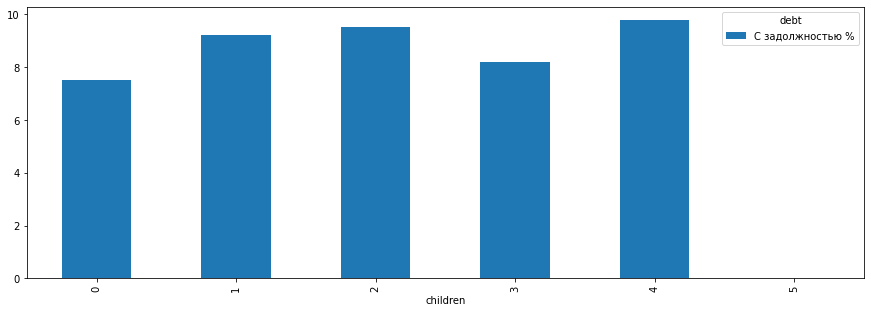

In [184]:
pivot_table = df.pivot_table(index='children', columns='debt',aggfunc='size',fill_value = 0)
pivot_table = pivot_table.rename(columns = {0:'Без задолжности %',1:'C задолжностью %'})
pivot_table['Всего'] = pivot_table['Без задолжности %'] + pivot_table['C задолжностью %'] 
pivot_table['Без задолжности %'] = pd.to_numeric((pivot_table['Без задолжности %'] / pivot_table['Всего']) * 100).astype(float).round(1) 
pivot_table['C задолжностью %'] = pd.to_numeric((pivot_table['C задолжностью %'] / pivot_table['Всего']) * 100).astype(float).round(1) 
pivot_table = pivot_table.sort_values('children', ascending=True)
pivot_table.plot(use_index=True, y=['C задолжностью %'],kind='bar',figsize=(15, 5),sort_columns=True)
display(pivot_table)


Таблица pivot_table - показывает чем больше детей тем меньше желающих взять кредит и просрочить его, если судить по колличеству людей которое резко уменьшается после появления очередного ребёнка. 
Интересен тот факт что люди с 3мя детьми реже просрочивают кредиты чем те  у кого 1 или 2 ребёнка, но скорее всего это связано с колличеством таких людей. В целом дети повышают шанс невыплаты кредита на 1,6% судя по разнице в проценте между наличием и отсутвием ребёнка. В среднем задолжность у всех у кого есть дети 9.1%, у кого их нет 7,5%  7.5-9.1 = 1.6%.

Вывод о том что чем больше детей тем меньше желающих взять кредит исходит от уменьшения количества строк в колонке "всего" тобиш самих людей. Только самые отчаенные будут брать кредиты когда у них больше 2 ребёнка. Так как это доп расходы. Соответвено об этом и говорит колонка потому что таких людей очень мало. А если они и есть то у них самый большой % невозврата 9.8%. При любом количестве детей % невозврата в любом случае выше чем без детей.

##### Вопрос 2: Есть ли зависимость между семейным положением и возвратом кредита в срок?

,family_status_id,Без задолжности %,C задолжностью %,family_status,Всего
2,2,93.4,6.6,вдовец / вдова,955
3,3,93.0,7.0,в разводе,1193
0,0,92.4,7.6,женат / замужем,12290
1,1,90.7,9.3,гражданский брак,4138
4,4,90.3,9.7,Не женат / не замужем,2801


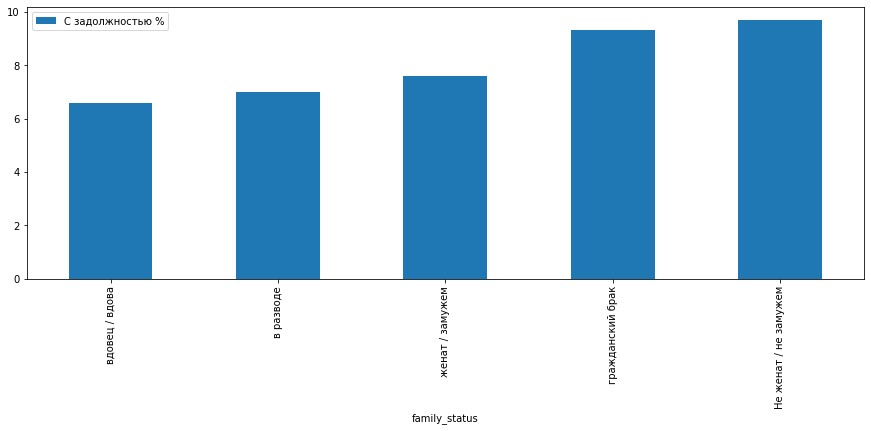

In [185]:

pivot_table = df.pivot_table(index='family_status_id', columns='debt',aggfunc='size',fill_value = 0)
pivot_table = pivot_table.merge(family_status_cat,on='family_status_id')
pivot_table = pivot_table.rename(columns = {0:'Без задолжности %',1:'C задолжностью %'})
pivot_table['Всего'] = pivot_table['Без задолжности %'] + pivot_table['C задолжностью %'] 
pivot_table['Без задолжности %'] = pd.to_numeric((pivot_table['Без задолжности %'] / pivot_table['Всего']) * 100).astype(float).round(1) 
pivot_table['C задолжностью %'] = pd.to_numeric((pivot_table['C задолжностью %'] / pivot_table['Всего']) * 100).astype(float).round(1)
pivot_table = pivot_table.sort_values('C задолжностью %', ascending=True) 
pivot_table.plot(x ='family_status', y=['C задолжностью %'],kind='bar',figsize=(15, 5),)
display(pivot_table)


Все тоже самое. Данные не сильно отличаются во всех категориях. Зависимости нет. В категории вдовец / вдова	меньше всего должников. в Не женат / не замужем	больше всего людей с задолжностью.
Данные отфильтрованы по % с должниками.

##### Вопрос 3: Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

0–30000 — 'E';
30001–50000 — 'D';
50001–200000 — 'C';
200001–1000000 — 'B';
1000001 и выше — 'A'.

debt,Без задолжности %,C задолжностью %,Всего
total_income_category,,,
D,94.0,6.0,350
B,92.9,7.1,5020
A,92.0,8.0,25
C,91.5,8.5,15960
E,90.9,9.1,22


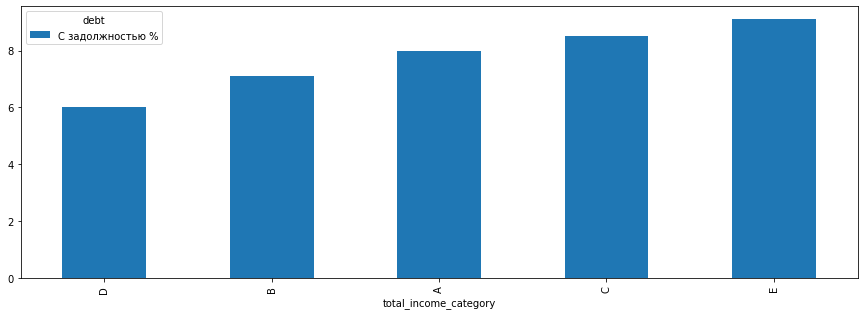

In [186]:
pivot_table = df.pivot_table(index='total_income_category', columns='debt',aggfunc='size',fill_value = 0)
pivot_table = pivot_table.rename(columns = {0:'Без задолжности %',1:'C задолжностью %'})
pivot_table['Всего'] = pivot_table['Без задолжности %'] + pivot_table['C задолжностью %'] 
pivot_table['Без задолжности %'] = pd.to_numeric((pivot_table['Без задолжности %'] / pivot_table['Всего']) * 100).astype(float).round(1) 
pivot_table['C задолжностью %'] = pd.to_numeric((pivot_table['C задолжностью %'] / pivot_table['Всего']) * 100).astype(float).round(1) 
pivot_table = pivot_table.sort_values('C задолжностью %', ascending=True)
pivot_table.plot(use_index=True,y=[1],kind='bar',figsize=(15, 5), legend=True)
display(pivot_table)

У категории 'A' и 'E' практически одинаковое соотношение.
Зависимости нет. Богатым(А) почти настолько же не нужен кредит как бедным (E). Самый низкий процент должников в категории D.

##### Вопрос 3: Как разные цели кредита влияют на его возврат в срок?


debt,Без задолжности %,C задолжностью %,total
purpose_category,,,
операции с недвижимостью,92.8,7.2,10774
проведение свадьбы,92.1,7.9,2315
получение образования,90.8,9.2,3998
операции с автомобилем,90.7,9.3,4290


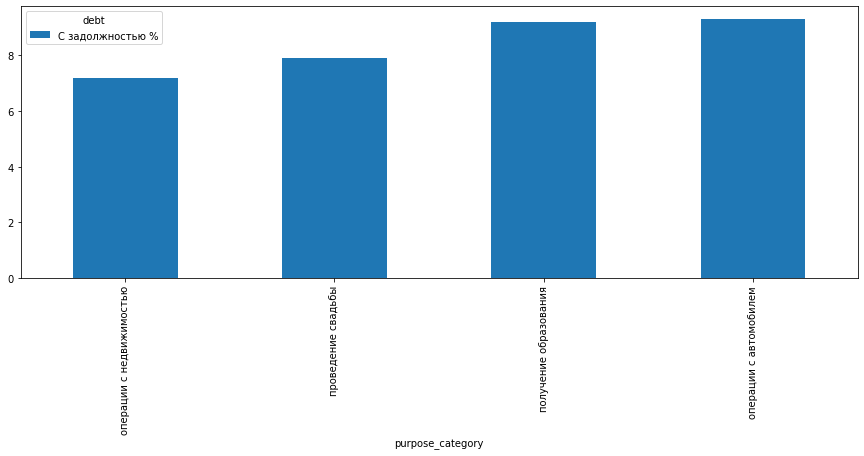

In [187]:
pivot_table = df.pivot_table(index='purpose_category', columns='debt',aggfunc='size',fill_value = 0)
pivot_table = pivot_table.rename(columns = {0:'Без задолжности %',1:'C задолжностью %'})
pivot_table['total'] = pivot_table['Без задолжности %'] + pivot_table['C задолжностью %'] 
pivot_table['Без задолжности %'] = pd.to_numeric((pivot_table['Без задолжности %'] / pivot_table['total']) * 100).astype(float).round(1) 
pivot_table['C задолжностью %'] = pd.to_numeric((pivot_table['C задолжностью %'] / pivot_table['total']) * 100).astype(float).round(1) 
pivot_table = pivot_table.sort_values('C задолжностью %', ascending=True)
pivot_table.plot(use_index=True, y=['C задолжностью %'],kind='bar',figsize=(15, 5))
display(pivot_table)

На операциях с недвижимостью больше всего заемщиков и самый маленький %  должников.

## Общий вывод:

Идеальный заёмщик это человек без детей, в разводе или вдовец, зарабатывающий 30001–50000 — 'D' берущий кредит на операции с недвижимостью.
Общий риск я думаю что можно расчитать следующим образом = children[%]+family_status_id[%]+total_income_category[%]+purpose_category[%] / Ко-во параметров(4)
Для идеального заёмщика это будет = 6,8% что не вернёт кредит.
Вообщем все вопросы можно разделить на отдельные df и потом их объеденить например на разных листах и уже основываясь на этих данных писать скоринг. Можно ещё и возраст разбить по категориям.